# Interactive data analysis
__or, a Crash Course in Pandas, Jupyter, and Matplotlib__

## Install dependencies

In [ ]:
!pip install pandas numpy scipy matplotlib ipywidgets

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Static plots
%matplotlib inline

# Interactive plots
#%matplotlib notebook

## Create dummy data

In [3]:
np.random.seed(42)

x = np.linspace(0, 10, 500)
n = len(x)

df = pd.DataFrame({
    "x": x,
    "y=x": x,
    "y=sin(x)": np.sin(x),
    "y=sin(2x)": np.sin(2*x),
    "y=sin(x)-0.5*cos(2x)": np.sin(x) - 0.5*np.cos(2*x),
    "y=Unif[-1;1]": np.random.uniform(-1.0, 1.0, n),
    "y=sin(x)+Unif[-0.2;0.5]": np.sin(x) + np.random.uniform(-0.2, 0.5, n),
    "y=sin(x)*Unif[-0.2;0.5]": np.sin(x) * np.random.uniform(-0.2, 0.5, n),
})
df.set_index("x", inplace=True)

df.to_csv("./dummy_data.csv")

df

,y=x,y=sin(x),y=sin(2x),y=sin(x)-0.5*cos(2x),y=Unif[-1;1],y=sin(x)+Unif[-0.2;0.5],y=sin(x)*Unif[-0.2;0.5]
x,,,,,,,
0.00000,0.00000,0.000000,0.000000,-0.500000,-0.250920,0.288713,-0.000000
0.02004,0.02004,0.020039,0.040069,-0.479560,0.901429,0.195306,0.003594
0.04008,0.04008,0.040069,0.080075,-0.458325,0.463988,0.056739,0.016471
0.06012,0.06012,0.060084,0.119951,-0.436306,0.197317,0.429741,0.018780
0.08016,0.08016,0.080075,0.159635,-0.413514,-0.687963,0.359386,0.029195
...,...,...,...,...,...,...,...
9.91984,9.91984,-0.475086,0.836094,-0.749379,-0.293296,-0.610979,-0.127204
9.93988,9.93988,-0.492623,0.857404,-0.749946,0.167312,-0.050504,-0.115098
9.95992,9.95992,-0.509963,0.877337,-0.749901,-0.844531,-0.614190,-0.063463


In [4]:
!head -n 2 ./dummy_data.csv

x,y=x,y=sin(x),y=sin(2x),y=sin(x)-0.5*cos(2x),y=Unif[-1;1],y=sin(x)+Unif[-0.2;0.5],y=sin(x)*Unif[-0.2;0.5]
0.0,0.0,0.0,0.0,-0.5,-0.250919762305275,0.28871319981382154,-0.0


---

## Read data from CSV

In [5]:
data_path = "./dummy_data.csv"   # <--- edit
index_column = "x"               # <--- edit

df = pd.read_csv(data_path)
df.set_index(index_column, inplace=True)
df

,y=x,y=sin(x),y=sin(2x),y=sin(x)-0.5*cos(2x),y=Unif[-1;1],y=sin(x)+Unif[-0.2;0.5],y=sin(x)*Unif[-0.2;0.5]
x,,,,,,,
0.00000,0.00000,0.000000,0.000000,-0.500000,-0.250920,0.288713,-0.000000
0.02004,0.02004,0.020039,0.040069,-0.479560,0.901429,0.195306,0.003594
0.04008,0.04008,0.040069,0.080075,-0.458325,0.463988,0.056739,0.016471
0.06012,0.06012,0.060084,0.119951,-0.436306,0.197317,0.429741,0.018780
0.08016,0.08016,0.080075,0.159635,-0.413514,-0.687963,0.359386,0.029195
...,...,...,...,...,...,...,...
9.91984,9.91984,-0.475086,0.836094,-0.749379,-0.293296,-0.610979,-0.127204
9.93988,9.93988,-0.492623,0.857404,-0.749946,0.167312,-0.050504,-0.115098
9.95992,9.95992,-0.509963,0.877337,-0.749901,-0.844531,-0.614190,-0.063463


In [6]:
print("Columns")
print("-------")
print()
for name in df.columns:
    data = df[name]
    print(f"{name} (min={data.min()}, max={data.max()})")

Columns
-------

y=x (min=0.0, max=10.0)
y=sin(x) (min=-0.9999955891293856, max=0.9999985039156036)
y=sin(2x) (min=-0.9999911358725072, max=0.9999985039156036)
y=sin(x)-0.5*cos(2x) (min=-0.7499965591581726, max=1.4999955117490489)
y=Unif[-1;1] (min=-0.9898768323075626, max=0.9859295922386008)
y=sin(x)+Unif[-0.2;0.5] (min=-1.1189391877335677, max=1.4846476080421276)
y=sin(x)*Unif[-0.2;0.5] (min=-0.4837778096528864, max=0.4895114954710896)


In [7]:
df.describe()

,y=x,y=sin(x),y=sin(2x),y=sin(x)-0.5*cos(2x),y=Unif[-1;1],y=sin(x)+Unif[-0.2;0.5],y=sin(x)*Unif[-0.2;0.5]
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.000000,0.182989,0.030446,0.159510,-0.002877,0.320355,0.033995
std,2.895428,0.666276,0.700427,0.810976,0.597377,0.679302,0.175503
min,0.000000,-0.999996,-0.999991,-0.749997,-0.989877,-1.118939,-0.483778
25%,2.500000,-0.395843,-0.671081,-0.592753,-0.517441,-0.253561,-0.067078
50%,5.000000,0.312943,0.083034,-0.089118,0.026327,0.429663,0.015991
75%,7.500000,0.809538,0.716664,0.964891,0.512250,0.895125,0.126181
max,10.000000,0.999999,0.999999,1.499996,0.985930,1.484648,0.489511


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 500 entries, 0.0 to 10.0
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   y=x                      500 non-null    float64
 1   y=sin(x)                 500 non-null    float64
 2   y=sin(2x)                500 non-null    float64
 3   y=sin(x)-0.5*cos(2x)     500 non-null    float64
 4   y=Unif[-1;1]             500 non-null    float64
 5   y=sin(x)+Unif[-0.2;0.5]  500 non-null    float64
 6   y=sin(x)*Unif[-0.2;0.5]  500 non-null    float64
dtypes: float64(7)
memory usage: 31.2 KB


---

## Data visualization (static)

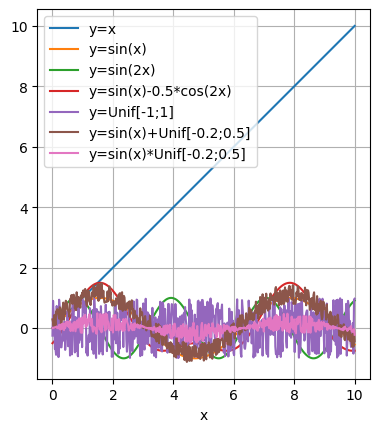

In [9]:
ax = df.plot(grid=True)
ax.set_aspect("equal")

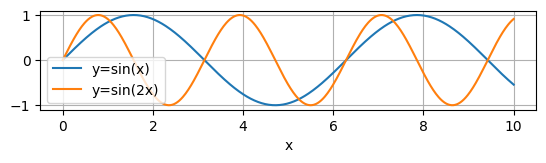

In [10]:
tmp_df = df[["y=sin(x)", "y=sin(2x)"]]
ax = tmp_df.plot(grid=True)
ax.set_aspect("equal")

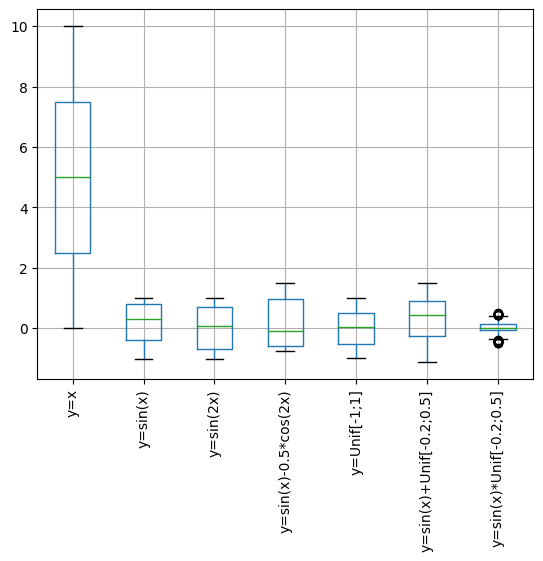

In [11]:
df.boxplot(grid=True, rot=90);

---

## Data processing

In [12]:
def rolling_average(dataframe_or_series, window_size=10):
    return dataframe_or_series.rolling(window_size).mean().dropna()

In [13]:
rolling_average(df, window_size=100)

,y=x,y=sin(x),y=sin(2x),y=sin(x)-0.5*cos(2x),y=Unif[-1;1],y=sin(x)+Unif[-0.2;0.5],y=sin(x)*Unif[-0.2;0.5]
x,,,,,,,
1.983968,0.991984,0.703912,0.414820,0.794842,-0.059639,0.871622,0.114181
2.004008,1.012024,0.712989,0.407200,0.812156,-0.066501,0.876994,0.112733
2.024048,1.032064,0.721778,0.398926,0.829025,-0.072787,0.883981,0.116998
2.044088,1.052104,0.730279,0.390011,0.845431,-0.081140,0.891554,0.120559
2.064128,1.072144,0.738485,0.380470,0.861359,-0.082941,0.894685,0.124330
...,...,...,...,...,...,...,...
9.919840,8.927856,0.400867,-0.379617,0.277335,0.035508,0.522563,0.061496
9.939880,8.947896,0.385974,-0.369413,0.254936,0.030013,0.512040,0.059332
9.959920,8.967936,0.370926,-0.358615,0.232593,0.022988,0.491675,0.058955


In [14]:
def normalize_to_fit_quantile(series, qmin=0.1, qmax=0.9):
    tmp = series.quantile([qmin, qmax])
    ymin = tmp.iat[0]
    ymax = tmp.iat[1]
    return (series - ymin) / (ymax - ymin)

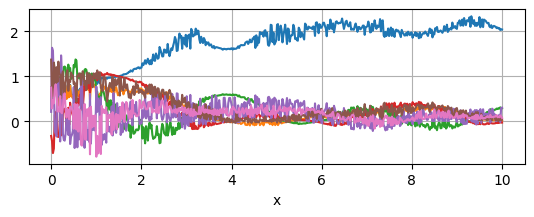

In [15]:
df_normalized = df.apply(normalize_to_fit_quantile, axis=1)
ax = df_normalized.plot(grid=True, legend=False)
ax.set_aspect("equal")

In [16]:
normalize_to_fit_quantile(df["y=x"])

x
0.00000    -0.125000
0.02004    -0.122495
0.04008    -0.119990
0.06012    -0.117485
0.08016    -0.114980
              ...   
9.91984     1.114980
9.93988     1.117485
9.95992     1.119990
9.97996     1.122495
10.00000    1.125000
Name: y=x, Length: 500, dtype: float64

---

## Interactive data visualization

In [17]:
def show_visualization_1(column: str, xmin: float, xmax: float):
    tmp_df = df[[column]]
    tmp_df = tmp_df.loc[(tmp_df.index >= xmin) & (tmp_df.index <= xmax)]
    tmp_df.index -= tmp_df.index[0]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 
    
    tmp_df.plot(ax=ax1, grid=True, legend=True)
    
    tmp_df.boxplot(ax=ax2, grid=True, rot=0)

In [18]:
df_xmin = df.index.min()
df_xmax = df.index.max()
df_columns = df.columns

widgets.interact(
    show_visualization_1,
    column=widgets.Dropdown(options=df_columns),
    xmin=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmin),
    xmax=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmax),
);

interactive(children=(Dropdown(description='column', options=('y=x', 'y=sin(x)', 'y=sin(2x)', 'y=sin(x)-0.5*co…

In [19]:
def show_visualization_2(
    column1: str, xmin1: float, xmax1: float, rolling_average_on1: bool, rolling_average_ws1: int,
    column2: str, xmin2: float, xmax2: float, rolling_average_on2: bool, rolling_average_ws2: int
):
    tmp_df1 = df[[column1]]
    tmp_df1 = tmp_df1.loc[(tmp_df1.index >= xmin1) & (tmp_df1.index <= xmax1)]
    tmp_df1.index -= tmp_df1.index[0]
    if rolling_average_on1:
        tmp_df1 = rolling_average(tmp_df1, rolling_average_ws1)
    
    tmp_df2 = df[[column2]]
    tmp_df2 = tmp_df2.loc[(tmp_df2.index >= xmin2) & (tmp_df2.index <= xmax2)]
    tmp_df2.index -= tmp_df2.index[0]
    if rolling_average_on2:
        tmp_df2 = rolling_average(tmp_df2, rolling_average_ws2)
    
    tmp_df = tmp_df1.join(tmp_df2, how="outer", lsuffix=" (#1)", rsuffix=" (#2)")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    tmp_df.plot(ax=ax1, grid=True, legend=True)
    
    tmp_df.boxplot(ax=ax2, grid=True, rot=0)
    
    return tmp_df.describe()

In [21]:
widgets.interact(
    show_visualization_2,
    column1=widgets.Dropdown(options=df_columns),
    column2=widgets.Dropdown(options=df_columns),
    xmin1=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmin),
    xmax1=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmax),
    xmin2=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmin),
    xmax2=widgets.BoundedFloatText(min=df_xmin, max=df_xmax, value=df_xmax),
    rolling_average_on1=widgets.Checkbox(False),
    rolling_average_ws1=widgets.BoundedIntText(min=2, max=200, value=10),
    rolling_average_on2=widgets.Checkbox(False),
    rolling_average_ws2=widgets.BoundedIntText(min=2, max=200, value=10),
);

interactive(children=(Dropdown(description='column1', options=('y=x', 'y=sin(x)', 'y=sin(2x)', 'y=sin(x)-0.5*c…